In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])

df = pd.read_csv('./uploads/tomi.csv',
                 skiprows=0,
                 delimiter=';')

profundidade = df["Profundidade"]
ID = df["ID"]
TN_perc = df["TN%"]
d15N = df["d15N"]
TOC_perc = df["TOC%"]
d13C = df["d13C"]
TOC_TN = df["TOC/TN"]

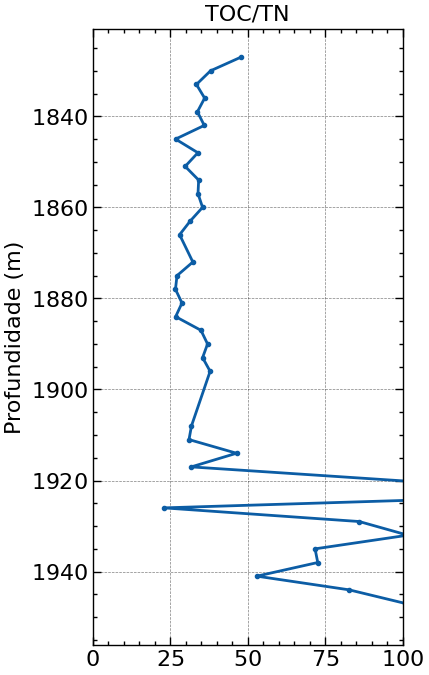

In [29]:
plt.figure(figsize=(4, 8))

plt.plot(TOC_TN, profundidade, '.-',label='TOC/TN')
plt.title('TOC/TN')
plt.ylabel('Profundidade (m)')
plt.xlim(0, 100)
plt.gca().invert_yaxis()

[ 47.85  38.03  33.48  36.13  33.8   36.01  26.75  33.95  29.85  34.2
  33.99  35.46  31.48  28.05  32.33  27.21  26.72  28.82  26.78  34.94
  37.07  35.47  37.9   31.88  31.09  46.42  31.81 165.17  23.02  86.01
 101.67  71.75  72.62  52.98  82.72 100.92 117.29]
[-26.3062136 -27.1419336 -27.2215728 -27.5381632 -27.7082568 -27.5656928
 -27.964872  -27.6197688 -28.1113688 -27.5548776 -27.0190336 -23.6053632
 -25.6228896 -25.8991688 -25.10376   -27.5126    -28.1998568 -28.5636408
 -28.1703608 -27.9540568 -26.273768  -27.8891656 -27.9855192 -27.3277584
 -27.6237016 -20.9369584 -27.6531976 -26.02      -25.7       -28.02
 -27.9       -27.9       -28.29      -28.32      -28.        -27.66
 -28.13     ]


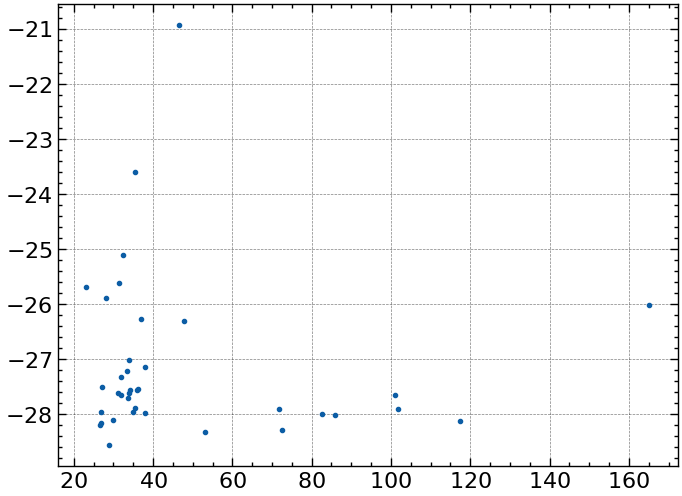

In [41]:
print(TOC_TN)
print(d13C)
plt.plot(TOC_TN, d13C, '.',label='d13C')

In [36]:
import numpy as np
from pykrige.ok import OrdinaryKriging

# Assuming TOC_TN and d13Corg are numpy arrays containing your data
TOC_TN = df["TOC/TN"].values
d13C = df["d13C"].values

# Define the grid
TOC_TN_grid = np.linspace(0, 100, 1001)
d13Corg_grid = np.linspace(-34, -10, 241)

# Perform ordinary kriging
OK = OrdinaryKriging(TOC_TN, d13C, np.zeros_like(TOC_TN), variogram_model='linear')
z, ss = OK.execute('grid', TOC_TN_grid, d13Corg_grid)

# z is the kriged grid

ValueError: Each lower bound must be strictly less than each upper bound.

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the kriged grid
c = ax.imshow(z, origin="lower", extent=[TOC_TN_grid.min(), TOC_TN_grid.max(), d13Corg_grid.min(), d13Corg_grid.max()])

# Add a colorbar
fig.colorbar(c, ax=ax)

# Set the labels
ax.set_xlabel("TOC/TN")
ax.set_ylabel("d13Corg")

# Show the plot
plt.show()